In [12]:
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS

import numpy as np
from numpy import (exp, sqrt, pi, sin, linspace, where)
from numpy.random import uniform, seed

from IPython import display

import librosa

import matplotlib.pyplot as plt
import librosa.display

seed(42)

path = './testAudio.wav'

## Method 1 - pyAudioAnalysis
The first approach was to use [pyAudioAnalysis](https://onkar-patil.medium.com/how-to-remove-silence-from-an-audio-using-python-50fd2c00557d) to find silent sections.

In [3]:

'''
[Fs, x] = aIO.read_audio_file(path)
segments = aS.silence_removal(x, 
							  Fs, 
							  .02, 
							  .02, 
							  weight=.3,
							  plot=True)
'''

'\n[Fs, x] = aIO.read_audio_file(path)\nsegments = aS.silence_removal(x, \n\t\t\t\t\t\t\t  Fs, \n\t\t\t\t\t\t\t  .02, \n\t\t\t\t\t\t\t  .02, \n\t\t\t\t\t\t\t  weight=.3,\n\t\t\t\t\t\t\t  plot=True)\n'

## Method 2 - Simple Energy Cut-off Calculation with Librosa
Use Librosa and [this energy calculation](https://musicinformationretrieval.com/energy.html) to look for silent sections.

In [14]:
display.Audio("testAudio.wav")

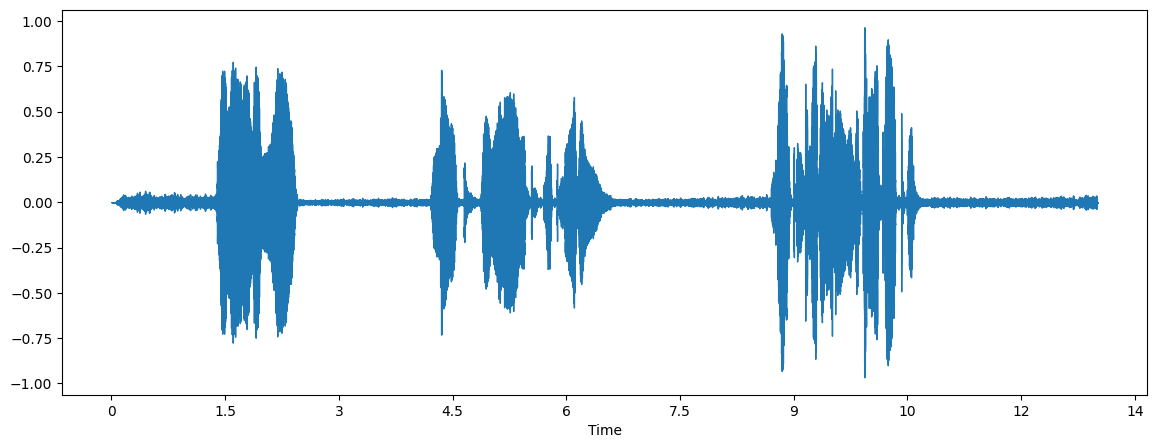

In [13]:
x,sr = librosa.load(path, sr=44000)

plt.figure(figsize=(14,5))

librosa.display.waveshow(x, sr = sr)


plt.show()

## Calculate Energy  
**Energy**: $\sum_n{|x(n)|^2}$  
**Root-Mean-Squared Energy**: $$\sqrt{\frac{1}{N}\sum_n{|x(n)|^2}}$$  
I'm not sure what $N$ is supposed to be here...I'm going to assume it's the total number of samples in the window.

In [5]:
duration = librosa.get_duration(y=x, sr=sr)
duration

13.013340909090909

In [6]:
hop_length = 512
frame_length = 1024

rmse = np.array([
    sqrt(sum(x[i:i+frame_length]**2) / frame_length)
    for i in range(0, len(x), hop_length)
])

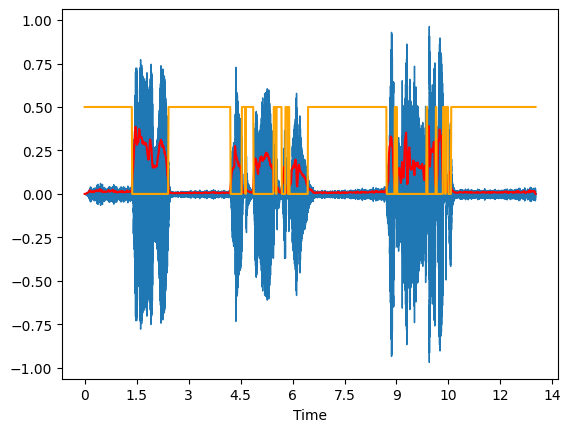

In [7]:
librosa.display.waveshow(x, sr=sr)

x_vals = linspace(0, duration, len(rmse))
plt.plot(x_vals,rmse, color="red")

silence = np.array([.5 if x < .04 else 0 for x in rmse])
plt.plot(x_vals, silence, color="orange");

In [8]:
len(x) / frame_length

559.1669921875

In [31]:
np.arange(-15,16)

array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
        -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        11,  12,  13,  14,  15])

In [35]:
def gaussian_kernel(x):
    return (1/(2*pi)) * exp((-1/2)*x**2)
    
window = 32
weights = np.array([gaussian_kernel(x) for x in np.arange(-1 * window/2 + 1, window/2) * .5])
weights

array([9.71153385e-14, 3.64422619e-12, 1.06499900e-10, 2.42392656e-09,
       4.29651263e-08, 5.93115274e-07, 6.37659013e-06, 5.33905355e-05,
       3.48150024e-04, 1.76805171e-03, 6.99278017e-03, 2.15392793e-02,
       5.16700450e-02, 9.65323526e-02, 1.40453744e-01, 1.59154943e-01,
       1.40453744e-01, 9.65323526e-02, 5.16700450e-02, 2.15392793e-02,
       6.99278017e-03, 1.76805171e-03, 3.48150024e-04, 5.33905355e-05,
       6.37659013e-06, 5.93115274e-07, 4.29651263e-08, 2.42392656e-09,
       1.06499900e-10, 3.64422619e-12, 9.71153385e-14])

In [ ]:
def gaussian_kernel(x):
    return (1/(2*pi)) * exp((-1/2)*x**2)

def window_func(series, func = gaussian_kernel, window=32, batch=16):
    weights = np.array([func(x) for x in np.arange(-1 * window/2 + 1, window/2)]

In [18]:
def run_lengths(series, skip = 0):
    segments = list()
    segments.append(series[0])
    index = 0
    last_element = series[0]
    for i in series:
        if i - last_element > skip + 1:
            segments.append(last_element)
            segments.append(i)
        index += 1
        last_element = i
    segments.append(last_element)
    return np.array(segments)
            

In [23]:
temp = run_lengths(where(rmse < 0.04)[0], 20)
temp

array([   0,  117,  208,  361,  390,  418,  469,  507,  554,  774,  848,
        849,  871, 1118])

In [24]:
len(temp)

14